# TOPIC MODELING :
# Part 1 :
### Extract data :
- 0/ Create empty df
- 1/ Extract corpus (Web scrapping on XML) and 1st article cleaning (regex)
- 2/ Add extracted data in the df and save the df




# Part 2 :
### Pre-processing :
- 0/ Open dataset
- 1/ Select data for training (aka, training dataset)
- 2/ remove stopword and Lemmatization


### Building word dictionnary :
- 0/ Creating term dictionary of corpus, where each unique term is assigned an index
- 1/ Filter terms which occurs in less than 4 articles (aim to reduce overfitting) & more than 40% of the articles (aim to reduce underfitting)
- 2/ List of few words which are removed from dictionary as they are content neutral
- 3/ Analyse The most frequent words with their respective frequencies


### Feature extraction (Bag of Words) : 
- 1/ Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.


### LDA model training :
- 0/ Naiv modeling
- 1/ Optimize hyper parameters
- 2/ Ajust the model with best hyper parameters 
- 3/ Analyse the result of all topics
- 4/ Save the model and the list of topics




# Part 3 :
### Load the LDA model :


### Open test data :


### Create functions for Pre-processing on test set :
- 0/ Clean article with regex
- 1/ Drop empty and useless article
- 2/ Clean article with stop word and lemmatization


### Document clustering :
- 0/ Clustering articles
- 1/ Analyse the result of the clustering


### Theme extraction :
- 0/ Give an article and obtain the topic of article


### Document exploration :
- 0/ Give a topic and obtain a list of articles (from test) which are the most probably belong to the mentionned topic


# _____________________________________________________________________________________________________

# Part 1 : 

# 1/ Extract data :

## Create an empty df 

In [ ]:
# Create an empty df :
import pandas as pd
 
df = pd.DataFrame({
    "article_nb": [],
    "corpus": []})
df

,article_nb,corpus


## Extract corpus (Web scrapping on XML) and 1st article cleaning (regex)

This code cleans and prepares Wikipedia data for further analysis and clustering based on the text of the articles. The DataFrame `df` will contain the cleaned Wikipedia articles ready to be used for NLP-based clustering.
Only corpuses will be used in our work, the corpus is the most important part in a wikipedia article and allows us to detect the theme.

In [ ]:
import xml.etree.ElementTree as ET
import codecs
import re
import os 

def is_ascii(s):
    return all(ord(c) < 128 for c in s)

list_XML_data = os.listdir('../DATA/XML_data/')

for h,j in enumerate(list_XML_data) :
    tree = ET.parse('..//DATA//XML_data//'+ j) 
    root = tree.getroot()

    for i,page in enumerate(root.findall('{http://www.mediawiki.org/xml/export-0.10/}page')):
        for p in page:    
            if p.tag == "{http://www.mediawiki.org/xml/export-0.10/}revision":
                for x in p:
                    if x.tag == "{http://www.mediawiki.org/xml/export-0.10/}text":                    
                        article_txt = x.text
                        if not article_txt == None:  
                            # Extracting the text portion from the article                                              
                            article_txt = article_txt[ : article_txt.find("==")]
                            
                            # remove text written between double curly braces
                            article_txt = re.sub(r"{{.*}}","",article_txt)
                            
                            # remove file attachments
                            article_txt = re.sub(r"\[\[File:.*\]\]","",article_txt)
                            
                            # remove Image attachments
                            article_txt = re.sub(r"\[\[Image:.*\]\]","",article_txt)
                            
                            # remove unwanted lines starting from special characters
                            article_txt = re.sub(r"\n: \'\'.*","",article_txt)
                            article_txt = re.sub(r"\n!.*","",article_txt)
                            article_txt = re.sub(r"^:\'\'.*","",article_txt)
                            
                            #  remove non-breaking space symbols
                            article_txt = re.sub(r"&nbsp","",article_txt)
                            
                            # remove URLs link
                            article_txt = re.sub(r"http\S+","",article_txt)
                            
                            # remove digits from text
                            article_txt = re.sub(r"\d+","",article_txt)   
                            
                            # remove text written between small braces
                            article_txt = re.sub(r"\(.*\)","",article_txt)
                            
                            # remove sentence which tells category of article
                            article_txt = re.sub(r"Category:.*","",article_txt)
                            
                            # remove the sentences inside infobox or taxobox
                            article_txt = re.sub(r"\| .*","",article_txt)
                            article_txt = re.sub(r"\n\|.*","",article_txt)
                            article_txt = re.sub(r"\n \|.*","",article_txt)
                            article_txt = re.sub(r".* \|\n","",article_txt)
                            article_txt = re.sub(r".*\|\n","",article_txt)
                            
                            # remove infobox or taxobox
                            article_txt = re.sub(r"{{Infobox.*","",article_txt)
                            article_txt = re.sub(r"{{infobox.*","",article_txt)
                            article_txt = re.sub(r"{{taxobox.*","",article_txt)
                            article_txt = re.sub(r"{{Taxobox.*","",article_txt)
                            article_txt = re.sub(r"{{ Infobox.*","",article_txt)
                            article_txt = re.sub(r"{{ infobox.*","",article_txt)
                            article_txt = re.sub(r"{{ taxobox.*","",article_txt)
                            article_txt = re.sub(r"{{ Taxobox.*","",article_txt)
                            
                            # remove lines starting from *
                            article_txt = re.sub(r"\* .*","",article_txt)
                            
                            # remove text written between angle bracket
                            article_txt = re.sub(r"<.*>","",article_txt)
                            
                            # remove new line character
                            article_txt = re.sub(r"\n","",article_txt)  
                            
                            # replace all punctuations with space
                            article_txt = re.sub(r"\!|\"|\#|\$|\%|\&|\'|\(|\)|\*|\+|\,|\-|\.|\/|\:|\;|\<|\=|\>|\?|\@|\[|\\|\]|\^|\_|\`|\{|\||\}|\~"," ",article_txt)
                            
                            # replace consecutive multiple space with single space
                            article_txt = re.sub(r" +"," ",article_txt)
                            
                            # replace non-breaking space with regular space
                            article_txt = article_txt.replace(u'\xa0', u' ')
                            
                            # Writing the clean text in df : 
                            if not article_txt == None and not article_txt == "" and len(article_txt) > 150 and is_ascii(article_txt) :
                                df_new = pd.DataFrame({
                                    "article_nb": ["article"+ str(h) + "_" + str(i+1)],
                                    "corpus": [article_txt]})
                                df = pd.concat([df, df_new], ignore_index=True)

## Add extracted data in the df and save the df

In [ ]:
df.head()

,article_nb,corpus
0,article1_2,Anarchism is a political philosophy and Polit...
1,article65_66,Alabama Alabama is nicknamed the Northern fli...
2,article67_68,In Greek mythology Achilles was a hero of the ...
3,article70_71,collapsible list collapsible list collapsible...
4,article71_72,An American in Paris is a jazz influenced orc...


In [ ]:
df.shape

(122780, 2)

In [ ]:
# save df as csv :
df.to_pickle("..//DATA//Wiki_corpus.pkl") 

#  ____________________________________________________________________________________________

# Part 2 :

# 2 / Pre-processing :

## Open dataset :

In [1]:
#read Wiki_corpus.pkl :
import pandas as pd

df_corpus = pd.read_pickle("..//DATA//Wiki_corpus.pkl")  
df_corpus

,article_nb,corpus
0,article1_2,Anarchism is a political philosophy and Polit...
1,article65_66,Alabama Alabama is nicknamed the Northern fli...
2,article67_68,In Greek mythology Achilles was a hero of the ...
3,article70_71,collapsible list collapsible list collapsible...
4,article71_72,An American in Paris is a jazz influenced orc...
...,...,...
122775,article140390_140391,In object oriented programming a metaclass is...
122776,article140397_140398,Steve Grand Officer of the Order of the Briti...
122777,article140398_140399,The dirham dirhem or dirhm is a silver unit of...
122778,article140399_140400,Add to this deletion debate An in joke amongs...


## Select data for training (aka, training dataset)

In [2]:
# Randomly sample 80% of 73000 articles from the corpus for training :
from sklearn.model_selection import train_test_split

df_corpus_train, df_corpus_test = train_test_split(df_corpus, test_size=0.2, random_state=42)
df_corpus_train

,article_nb,corpus
100131,article62909_62910,Bernhardt was an American politician and whit...
12603,article893_894,Bhutan s early history is steeped in mytholog...
45089,article72526_72527,Pleasantville is a City from the counted in t...
13688,article3150_3151,Intellectual capital is the result of mental ...
22524,article26194_26195,The Political Compass is a website soliciting...
...,...,...
119879,article129212_129213,Methil is an eastern coastal town in Scotland...
103694,article74268_74269,A real estate agent referred to often as a rea...
860,article2188_2189,In baseball statistics total bases does not in...
15795,article7932_7933,Walter Burley Griffin the Sydney suburb of Ca...


In [3]:
# save df_corpus_test as pkl and csv :
df_corpus_test.to_pickle("..//DATA//Wiki_corpus_test.pkl") 
df_corpus_test.to_csv("..//DATA//Wiki_corpus_test.csv") 


## Remove stop words from sentences & lemmatize words

This function takes a text as input (in the form of a string) and performs several text cleaning steps:

1. Removing stop words: Stop words are very common words (like "the", "is", "at", etc.) that do not contribute much meaning to the text and can be omitted to reduce the complexity of natural language processing. The function uses the NLTK (Natural Language Toolkit) library to load a predefined list of English stop words and then removes these words from the given text.

2. Lemmatizing words: Lemmatization is the process of reducing a word to its base form or root. For example, the words "running", "ran", and "runs" would be lemmatized to "run". The function also utilizes the NLTK library to perform this operation, and the words are lemmatized as verbs ('v').

3. Removing words with less than 3 characters: After lemmatization, the function removes words that have less than 3 characters. This helps to eliminate very short words that may not be meaningful in the context of the text.

In [4]:
# Function to remove stop words from sentences & lemmatize words. (pass the article text as string "doc")
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
#exclude = set(string.punctuation) #remove punctuation, but useless here.
lemma = WordNetLemmatizer()

def clean(doc):
    
    # remove stop words & punctuation, and lemmatize words
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    #p_free  = ''.join(ch for ch in stop_free if ch not in exclude) #remove punctuation, but useless here because they are already deleted.
    normalized = " ".join(lemma.lemmatize(word,'v') for word in stop_free.split())
    x = normalized.split()
    
    # only take words which are greater than 2 characters
    y = [s for s in x if len(s) > 2]
    return y

In [5]:
# Cleaning all the df_corpus_train articles :
df_corpus_train["corpus"] = df_corpus_train['corpus'].apply(clean)
df_corpus_train

,article_nb,corpus
100131,article62909_62910,"[bernhardt, american, politician, white, supre..."
12603,article893_894,"[bhutan, early, history, steep, mythology, rem..."
45089,article72526_72527,"[pleasantville, city, count, unite, state, cen..."
13688,article3150_3151,"[intellectual, capital, result, mental, proces..."
22524,article26194_26195,"[political, compass, website, solicit, respons..."
...,...,...
119879,article129212_129213,"[methil, eastern, coastal, town, scotland, fir..."
103694,article74268_74269,"[real, estate, agent, refer, often, real, esta..."
860,article2188_2189,"[baseball, statistics, total, base, increase, ..."
15795,article7932_7933,"[walter, burley, griffin, sydney, suburb, cast..."


# ________________________________________________________________________________

# 3/ Building word dictionnary :

## Creating term dictionary of corpus, where each unique term is assigned an index

This code uses the Gensim library to create a term dictionary from the corpus of text contained in `df_corpus_train["corpus"]`. The term dictionary is used to associate each unique term (word) in the corpus with a numerical index. This allows representing each document in the corpus as a numerical vector.


This means that the dictionary contains 47,634 unique terms, and some of the terms listed include 'abbotsford', 'administrator', 'advocate', 'american', 'april', and so on. The dictionary is ready to be used for further text processing and analysis tasks such as text vectorization for natural language processing or clustering purposes.

In [6]:
# Creating term dictionary of corpus, where each unique term is assigned an index.
from gensim import corpora

dictionary = corpora.Dictionary(df_corpus_train["corpus"])
print(dictionary)

Dictionary<171270 unique tokens: ['addition', 'also', 'american', 'anti', 'antisemitic']...>


## Filter terms which occurs in less than 4 articles (aim to reduce overfitting) & more than 40% of the articles (aim to reduce underfitting)

The code uses the `filter_extremes` method from the Gensim dictionary to perform these filtering operations:

1. `no_below=4`: Terms that appear in less than 4 articles will be removed from the dictionary. This eliminates terms that are too specific and do not contribute significantly to modeling general themes or topics.

2. `no_above=0.4`: Terms that appear in more than 40% of the articles will be removed from the dictionary. This eliminates common terms that are not informative and do not help distinguish articles from each other.

After applying this filtering, the dictionary will only contain terms that strike an appropriate balance between specificity and frequency. This ensures the creation of a more generalized and informative clustering model.


In [7]:
# Filter terms which occurs in less than 4 articles (aim to reduce overfitting) & more than 40% of the articles (aim to reduce underfitting)
"""
All the tokens in the dictionary which either have occurred in less than 4 articles or have occurred in more than 40% of the 
articles are removed from the dictionary, as these words will not be contributing to the various themes or topics.
"""

dictionary.filter_extremes(no_below=4, no_above=0.4)
print(dictionary)

Dictionary<43801 unique tokens: ['addition', 'also', 'american', 'anti', 'antisemitic']...>


## List of few words which are removed from dictionary as they are content neutral

In this code, a list of words is created, referred to as the stoplist, which contains content-neutral words. These are words that do not carry strong semantic meaning or represent specific themes or topics. Instead, they are common words that might appear frequently across different documents, but they do not contribute much to the modeling of meaningful word distributions or themes.

The purpose of this code is to filter out these content-neutral words from the dictionary to prevent them from affecting the clustering process. By removing such words, the model can focus more on capturing meaningful patterns and themes in the text.

By removing content-neutral words, the model can focus on identifying and capturing the key themes and topics present in the text, leading to more informative and accurate clustering results.

This means that the dictionary now contains 12,970 unique terms, and some of the terms listed include 'administrator', 'advocate', 'american', 'april', 'baronet', and so on. These terms are the ones that have survived the filtering process and will be used for further text processing and clustering analysis.

In [8]:
# List of few words which are removed from dictionary as they are content neutral

"""
After printing the most frequent words of the dictionary, we found that few words which are mostly content neutral words are also 
present in the dictionary. These words may lead to modeling of “word distribution”(topic) which is neutral and do not capture any 
theme or content. We made a list of such words and filtered all such words.
"""

stoplist = set('also use make people know many call include part find become like mean often different \
               usually take wikt come give well get since type list say change see refer actually iii \
               aisne kinds pas ask would way something need things want every str'.split())
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)
print(dictionary)

Dictionary<43758 unique tokens: ['addition', 'american', 'anti', 'antisemitic', 'bernhardt']...>


## Analyse The most frequent words with their respective frequencies


In this code, the dictionary has been converted into the desired format for further processing. The code lists the words with their frequencies and also provides the corresponding unique IDs assigned to each word in the vocabulary.



In [ ]:
# Convert the dictionary into the desired format
words_frequency = list(dictionary.token2id.items())
ids = list(dictionary.token2id.values())

# Sort the words and frequencies by frequency in descending order
words_frequency.sort(key=lambda x: x[1], reverse=False)
ids.sort(key=lambda x: dictionary[x], reverse=False)

# Print the result : from most frequent to least frequent, here the most frequent word is "age"
print("Words Frequency:")
print(words_frequency) # example : "age" is the most frequent word ('age', 0), ('word', classement of the frequence)

# Each word is also given a unique id in the vocabulary (dictionary) :
print("\nIDs:")
print(ids) # List of Ids

# __________________________________________________________________________________

# 4/ Feature extraction (Bag of Words) :

## Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.

In this code, the list of documents (corpus) is converted into a Document Term Matrix (DTM) using the dictionary prepared above. The DTM represents the frequency of each word (term) in each document.

The Document Term Matrix (DTM) is a fundamental data representation used in various natural language processing (NLP) tasks, such as topic modeling, document clustering, and information retrieval. It allows us to efficiently represent and analyze the text data in a format that can be easily used for various machine learning and statistical modeling techniques.


In [ ]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df_corpus_train["corpus"]]
doc_term_matrix

### Example on article1_9788 :

# ______________________________________________________________________________________

# 5/ LDA Model Training :

## Naiv modeling 

The code provided uses the Gensim library to create and train an LDA (Latent Dirichlet Allocation) model on the Document Term Matrix (DTM). LDA is a topic modeling technique that aims to discover hidden topics in a collection of text documents.



The coherence score for the LDA model using the C_V coherence measure is approximately 0.535. This score indicates the degree of coherence and interpretability of the topics discovered by the LDA model. A higher coherence score suggests that the topics are more coherent and better represent meaningful themes in the text corpus.

A coherence score around 0.4 is generally considered reasonable for topic models, but the interpretability of the topics should be further explored and validated. Depending on the specific use case and requirements, fine-tuning the number of topics and other hyperparameters of the LDA model may lead to even better coherence scores and more meaningful topic representations.

In [11]:
from gensim.models.ldamodel import LdaModel as Lda
# Creating the object for LDA model using gensim library & Training LDA model on the document term matrix.
ldamodel = Lda(corpus=doc_term_matrix, id2word = dictionary, num_topics=10, random_state=42, alpha="symmetric", eta=0.01) #iterations=500,
ldamodel

In [12]:
from gensim.models import CoherenceModel

coherence_model = CoherenceModel(model=ldamodel, texts=df_corpus_train["corpus"], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
coherence_score

0.5349482956061204

# Optimize hyper-parameters

In [ ]:
# Optimisation des hyperparamètres :
#Bayesian Optimisation (optuna) :
from gensim.models import CoherenceModel
import optuna

def objective(trial):
    alpha = trial.suggest_categorical('alpha', ['symmetric', 'asymmetric']) #nb of tree
    beta = trial.suggest_float('beta', 0.01, 1) #profondeur
    #num_iterations = trial.suggest_catgorical('num_iterations', 100, 500)
    num_topics = trial.suggest_int('num_topics', 0, 60) #, step=5

    model = Lda(random_state=42, corpus=doc_term_matrix, id2word=dictionary, num_topics=num_topics, alpha=alpha, eta=beta) #iterations=500

    coherence_model = CoherenceModel(model=model, texts=df_corpus_train["corpus"], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence() 
    return coherence_score


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

In [26]:
trial = study.best_trial
print('coherence_score: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

coherence_score: 0.6140356916036728
Best hyperparameters: {'alpha': 'symmetric', 'beta': 0.3483459145159808, 'num_topics': 23}


## Ajust the model with best hyper parameters 

In [47]:
#Ajust the model with best hyper parameters :
best_ldamodel = Lda(random_state=42, corpus=doc_term_matrix, id2word=dictionary, num_topics=(trial.params)["num_topics"], alpha=(trial.params)["alpha"], eta=(trial.params)["beta"])

## Analyse the result of all topics 

The code provided is intended to analyze and print all the topics learned by the best LDA model (best_ldamodel). The print_topics method of the LDA model allows us to obtain the top words associated with each topic. It returns a list of tuples, where each tuple represents a topic and its top words.

Each topic is represented by a number (topic index), and the top words associated with that topic are displayed in descending order of their probability of being assigned to that topic by the model.

In [49]:
# Analyse the result Print all topics :
list_topic = best_ldamodel.print_topics(num_words=10, num_topics=23)
list_topic

[(0,
  '0.021*"company" + 0.015*"university" + 0.012*"service" + 0.010*"public" + 0.009*"market" + 0.009*"school" + 0.008*"education" + 0.007*"business" + 0.007*"found" + 0.007*"international"'),
 (1,
  '0.006*"light" + 0.006*"power" + 0.005*"surface" + 0.005*"energy" + 0.005*"high" + 0.005*"may" + 0.004*"one" + 0.004*"system" + 0.004*"two" + 0.004*"water"'),
 (2,
  '0.042*"state" + 0.031*"unite" + 0.023*"party" + 0.015*"government" + 0.012*"president" + 0.010*"serve" + 0.009*"election" + 0.008*"house" + 0.008*"general" + 0.008*"court"'),
 (3,
  '0.016*"language" + 0.014*"church" + 0.011*"century" + 0.009*"ancient" + 0.007*"english" + 0.007*"greek" + 0.007*"name" + 0.006*"christian" + 0.006*"history" + 0.006*"culture"'),
 (4,
  '0.020*"series" + 0.017*"book" + 0.014*"american" + 0.014*"television" + 0.012*"publish" + 0.012*"character" + 0.010*"first" + 0.010*"write" + 0.009*"show" + 0.007*"fiction"'),
 (5,
  '0.082*"year" + 0.048*"roman" + 0.047*"calendar" + 0.031*"period" + 0.026*"nam

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_21132\1442987663.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


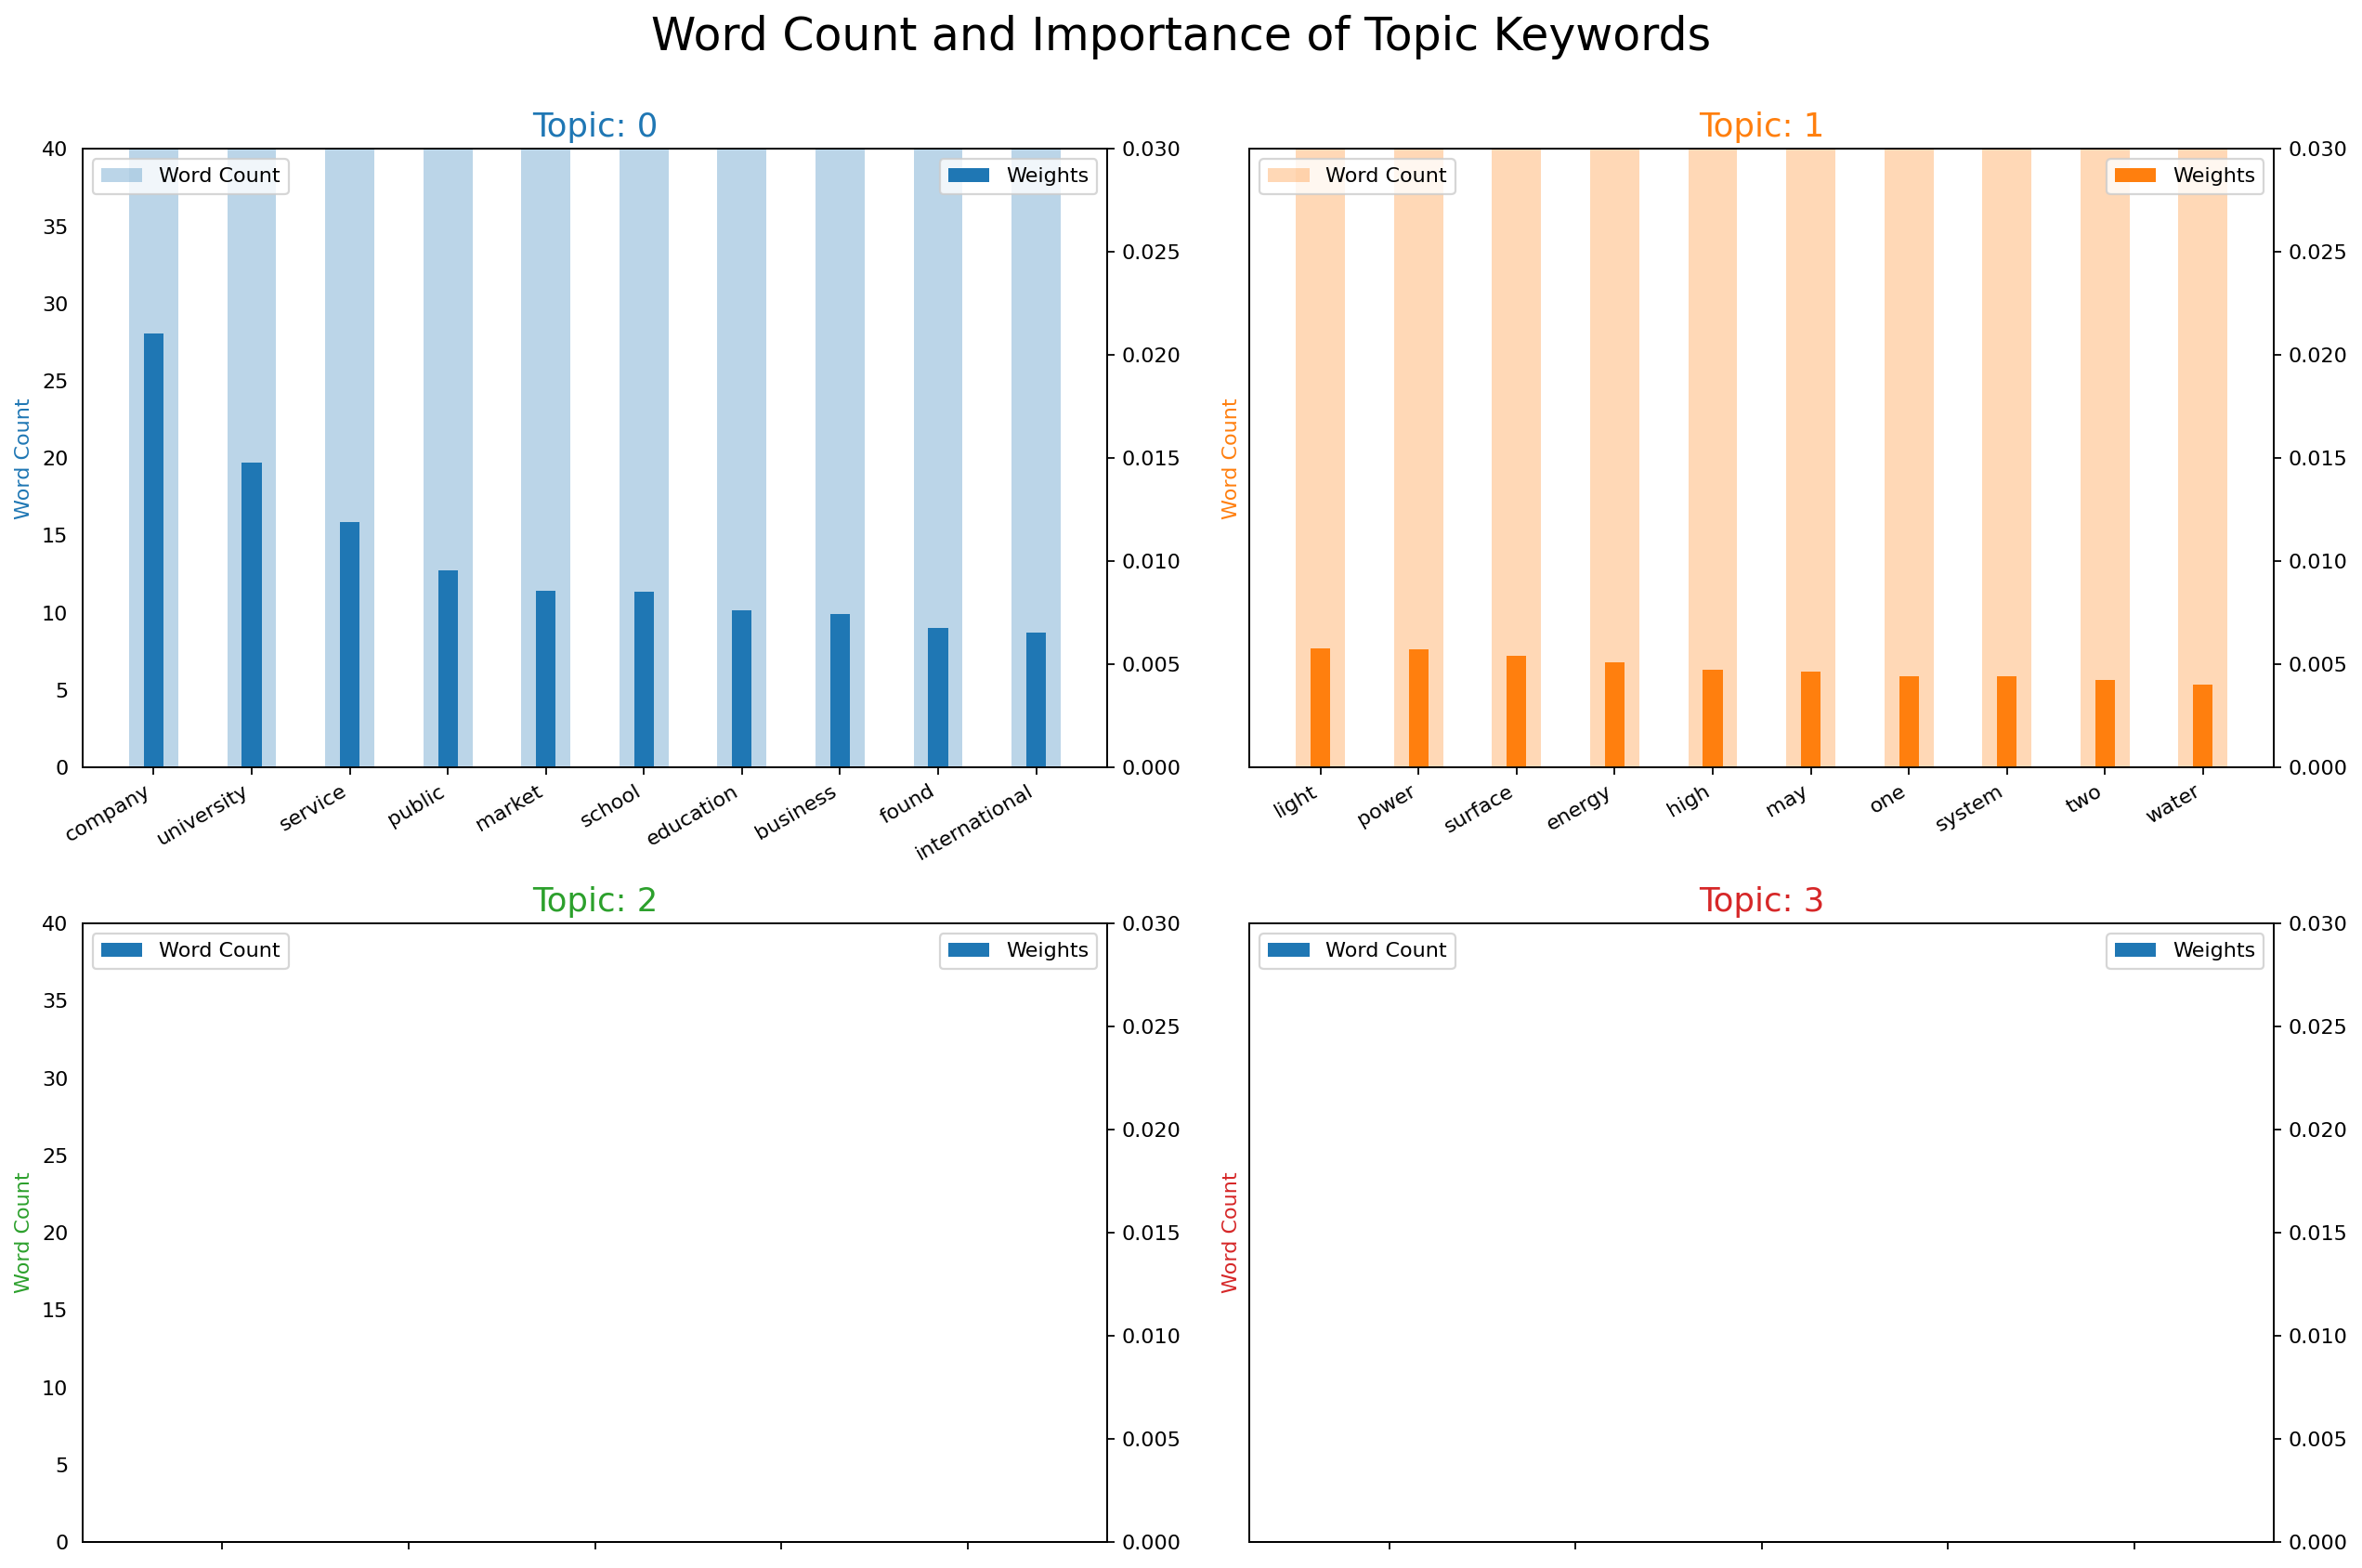

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from collections import Counter

topics = best_ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in df_corpus_train["corpus"] for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 40)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

## Save the model and the list of topics

In [52]:
# Save the LDA model : dump LDA model using pickle for future use
import pickle

ldafile = open('..//MODEL//lda_model_sym_wiki.pkl','wb')
pickle.dump(best_ldamodel,ldafile)
ldafile.close()

In [53]:
#Save the list of topic in file.txt :
open("..//REPORTS//OUTPUT//List_of_topic.txt", "wb")

with open("..//REPORTS//OUTPUT//List_of_topic.txt", "w") as f :
    for topic in list_topic :
        f.write(str(topic) + "\n")
f.close()

# _____________________________________________________________________________________

# Part 3 :

## Load the LDA model

In [54]:
# Load the LDA model : dump LDA model using pickle for future use
import pickle

lda_model = pickle.load(open('..//MODEL//lda_model_sym_wiki.pkl','rb'))

## Open test data

In [55]:
#read Wiki_corpus_test.pkl :
import pandas as pd

df_corpus_test = pd.read_pickle("..//DATA//Wiki_corpus_test.pkl")  
df_corpus_test

,article_nb,corpus
2687,article6067_6068,Elwyn Brooks White In a survey of School Libr...
79474,article85807_85808,Matthew Tindal was an eminent England English...
17990,article13511_13512,Rationality is the Quality acts rationally if...
63148,article36753_36754,Earl of Essex is a title in the Peerage of En...
11461,article25907_25908,The Quirinal Hill is one of the Seven Hills o...
...,...,...
79009,article84363_84364,Matthew Nicholas Hales and various television...
62764,article35586_35587,by encouraging people to walk or ride a bike ...
105929,article80803_80804,Cerdon is a Communes of France commune in the...
115301,article112401_112402,The Ontario Science Centre formally the Cente...


# Pre-processing on test set :

In [56]:
# 1/ Clean article with regex :
import re

def is_ascii(s):
    return all(ord(c) < 128 for c in s)


def clean_with_regex(article_txt) :
    if not article_txt == None:  
        # Extracting the text portion from the article                                              
        article_txt = article_txt[ : article_txt.find("==")]

        # remove text written between double curly braces
        article_txt = re.sub(r"{{.*}}","",article_txt)

        # remove file attachments
        article_txt = re.sub(r"\[\[File:.*\]\]","",article_txt)

        # remove Image attachments
        article_txt = re.sub(r"\[\[Image:.*\]\]","",article_txt)

        # remove unwanted lines starting from special characters
        article_txt = re.sub(r"\n: \'\'.*","",article_txt)
        article_txt = re.sub(r"\n!.*","",article_txt)
        article_txt = re.sub(r"^:\'\'.*","",article_txt)

        #  remove non-breaking space symbols
        article_txt = re.sub(r"&nbsp","",article_txt)

        # remove URLs link
        article_txt = re.sub(r"http\S+","",article_txt)

        # remove digits from text
        article_txt = re.sub(r"\d+","",article_txt)   

        # remove text written between small braces
        article_txt = re.sub(r"\(.*\)","",article_txt)

        # remove sentence which tells category of article
        article_txt = re.sub(r"Category:.*","",article_txt)

        # remove the sentences inside infobox or taxobox
        article_txt = re.sub(r"\| .*","",article_txt)
        article_txt = re.sub(r"\n\|.*","",article_txt)
        article_txt = re.sub(r"\n \|.*","",article_txt)
        article_txt = re.sub(r".* \|\n","",article_txt)
        article_txt = re.sub(r".*\|\n","",article_txt)

        # remove infobox or taxobox
        article_txt = re.sub(r"{{Infobox.*","",article_txt)
        article_txt = re.sub(r"{{infobox.*","",article_txt)
        article_txt = re.sub(r"{{taxobox.*","",article_txt)
        article_txt = re.sub(r"{{Taxobox.*","",article_txt)
        article_txt = re.sub(r"{{ Infobox.*","",article_txt)
        article_txt = re.sub(r"{{ infobox.*","",article_txt)
        article_txt = re.sub(r"{{ taxobox.*","",article_txt)
        article_txt = re.sub(r"{{ Taxobox.*","",article_txt)

        # remove lines starting from *
        article_txt = re.sub(r"\* .*","",article_txt)

        # remove text written between angle bracket
        article_txt = re.sub(r"<.*>","",article_txt)

        # remove new line character
        article_txt = re.sub(r"\n","",article_txt)  

        # replace all punctuations with space
        article_txt = re.sub(r"\!|\"|\#|\$|\%|\&|\'|\(|\)|\*|\+|\,|\-|\.|\/|\:|\;|\<|\=|\>|\?|\@|\[|\\|\]|\^|\_|\`|\{|\||\}|\~"," ",article_txt)

        # replace consecutive multiple space with single space
        article_txt = re.sub(r" +"," ",article_txt)

        # replace non-breaking space with regular space
        article_txt = article_txt.replace(u'\xa0', u' ')
        
        if is_ascii(article_txt):
            return article_txt
        else :
            return ""
        

#df_corpus_test["corpus"] = df_corpus_test["corpus"].apply(clean_with_regex)

In [57]:
# 2/ drop empty and useless article :
#df_corpus_test =  df_corpus_test[(df_corpus_test['corpus'] != None) & (df_corpus_test['corpus'] != "") & (len(df_corpus_test['corpus']) > 150)]
#df_corpus_test

In [58]:
# 3/ Clean article with stop word and lemmatization :

# Function to remove stop words from sentences & lemmatize words. (pass the article text as string "doc")
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
#exclude = set(string.punctuation) #remove punctuation, but useless here.
lemma = WordNetLemmatizer()


def clean_with_stopword_lemmatization(doc):
    
    # remove stop words & punctuation, and lemmatize words
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    #p_free  = ''.join(ch for ch in stop_free if ch not in exclude) #remove punctuation, but useless here because they are already deleted.
    normalized = " ".join(lemma.lemmatize(word,'v') for word in stop_free.split())
    x = normalized.split()
    
    # only take words which are greater than 2 characters
    y = [s for s in x if len(s) > 2]
    return y

#df_corpus_test["corpus"] = df_corpus_test['corpus'].apply(clean_with_stopword_lemmatization)
#df_corpus_test

# _______________________________________________________________________________________

# 7/ Document clustering :

Performs document clustering given a set of documents :
The below Python function follows the above steps to perform document clustering given an article corpus.

Document clustering is an unsupervised approach to cluster the articles depending upon the topics which have been discovered 
in the training phase. Document clustering takes a corpus of unlabeled articles as an input and categorizes them in various groups 
according to the best matched word distributions (topics) generated from training. Following are the steps performed for document clustering.

- 1/ Clean all the articles in the input cluster.
- 2/ Convert each of the text articles into bag-of-words features using the same dictionary of trained model.
- 3/ Extract the best matched topic from each article using the trained LDA model. In gensim implementation, we have get_document_topic()function which does the same.
- 4/ Write the article in the directory belonging to extracted topic if minimum probability criteria is satisfied, otherwise push it in 
the “unknown” directory.
- 5/ If the extracted topic (word distribution) is ambiguous , then we choose the 2nd best matched topic (as some of the discovered 50 topics are content neutral).

In [59]:
# Clustering articles
from operator import itemgetter

def cluster_similar_documents(doc):
    #rename topics (unknown if the topic looks neutral):
    topics = ['Education and International Companies',
            'Energy and Natural Elements',
            'Politics and Government in the United States',
            'Language, History, and Culture',
            'Television Series and Fictional Characters',
            'Historical Periods in Europe',
            'Computer Systems and Software',
            'German Royalty and Art',
            'Film Awards and Performances',
            'Military and Aircrafts',
            'Human Rights and Social Movements',
            'Demographics and Geography',
            'Music and Record Releases',
            'Geographic Locations and Parks',
            'Biological Processes and Chemicals',
            'Wars and Battles',
            'British Universities and Schools',
            'Titles and Kingdoms',
            'Sports and Football Leagues',
            'Plant and Species',
            'Colors and Materials',
            'Mathematical Terms and Concepts',
            'Geographic Features and Rivers']


    #Pre-processing :
    doc = clean_with_regex(doc)
    doc = doc if (doc != None) & (len(doc) > 150) else ""
    doc = clean_with_stopword_lemmatization(doc)
    
    #doc_bow
    doc_bow = lda_model.id2word.doc2bow(doc)
    
    #doc_topics
    doc_topics = lda_model.get_document_topics(doc_bow, minimum_probability=0.05)
    
    # return the most pertinent topic :
    if doc_topics:
        doc_topics.sort(key = itemgetter(1), reverse=True)
        theme = topics[doc_topics[0][0]]
        theme_proba = round(doc_topics[0][1], 3)
        if theme == "unknown":
            try :
                theme = topics[doc_topics[1][0]]
                theme_proba = round(doc_topics[1][1], 3)
            except IndexError :
                theme = topics[doc_topics[0][0]]
                theme_proba = round(doc_topics[0][1], 3) 
    else:
        theme = "unknown"
        theme_proba = 0
        
    return pd.Series([theme, theme_proba])

df_corpus_test[["topic", "topic_proba"]] = df_corpus_test['corpus'].apply(lambda corpus : cluster_similar_documents(corpus))
df_corpus_test

,article_nb,corpus,topic,topic_proba
2687,article6067_6068,Elwyn Brooks White In a survey of School Libr...,Television Series and Fictional Characters,0.648
79474,article85807_85808,Matthew Tindal was an eminent England English...,"Language, History, and Culture",0.588
17990,article13511_13512,Rationality is the Quality acts rationally if...,Human Rights and Social Movements,0.628
63148,article36753_36754,Earl of Essex is a title in the Peerage of En...,Titles and Kingdoms,0.572
11461,article25907_25908,The Quirinal Hill is one of the Seven Hills o...,Geographic Features and Rivers,0.328
...,...,...,...,...
79009,article84363_84364,Matthew Nicholas Hales and various television...,Music and Record Releases,0.451
62764,article35586_35587,by encouraging people to walk or ride a bike ...,Human Rights and Social Movements,0.234
105929,article80803_80804,Cerdon is a Communes of France commune in the...,Wars and Battles,0.322
115301,article112401_112402,The Ontario Science Centre formally the Cente...,Geographic Locations and Parks,0.644


In [61]:
# Analyse the result of the clustering
pd.DataFrame(df_corpus_test['topic'].value_counts()).rename(columns={"topic": "nb_of_article"})

,nb_of_article
Demographics and Geography,4464
Television Series and Fictional Characters,1585
"Language, History, and Culture",1511
Politics and Government in the United States,1468
Music and Record Releases,1374
Human Rights and Social Movements,1244
Geographic Locations and Parks,1198
Education and International Companies,1130
Computer Systems and Software,1120
Plant and Species,1035


# ______________________________________________________________________________________

# 8/ Theme Extraction :

The below Python function extracts the theme from article given as an argument.

In [70]:
article = "Apple Inc. is an American multinational technology company headquartered in Cupertino, California. Apple is the world's largest technology company by revenue, with US$394.3 billion in 2022 revenue.[6] As of March 2023, Apple is the world's biggest company by market capitalization.[7] As of June 2022, Apple is the fourth-largest personal computer vendor by unit sales and the second-largest mobile phone manufacturer in the world. It is considered one of the Big Five American information technology companies, alongside Alphabet (parent company of Google), Amazon, Meta Platforms, and Microsoft. Apple was founded as Apple Computer Company on April 1, 1976, by Steve Wozniak, Steve Jobs (1955–2011) and Ronald Wayne to develop and sell Wozniak's Apple I personal computer. It was incorporated by Jobs and Wozniak as Apple Computer, Inc. in 1977. The company's second computer, the Apple II, became a best seller and one of the first mass-produced microcomputers. Apple went public in 1980 to instant financial success. The company developed computers featuring innovative graphical user interfaces, including the 1984 original Macintosh, announced that year in a critically acclaimed advertisement called 1984. By 1985, the high cost of its products, and power struggles between executives, caused problems. Wozniak stepped back from Apple and pursued other ventures, while Jobs resigned and founded NeXT, taking some Apple employees with him."

def Theme_extraction(article) :
    print(f"For the given article : {article}")
    print(f"Topic -> {cluster_similar_documents(article)[0]}")
    print((f"Topic proba -> {round(cluster_similar_documents(article)[1], 3)}"))
    
Theme_extraction(article)

For the given article : Apple Inc. is an American multinational technology company headquartered in Cupertino, California. Apple is the world's largest technology company by revenue, with US$394.3 billion in 2022 revenue.[6] As of March 2023, Apple is the world's biggest company by market capitalization.[7] As of June 2022, Apple is the fourth-largest personal computer vendor by unit sales and the second-largest mobile phone manufacturer in the world. It is considered one of the Big Five American information technology companies, alongside Alphabet (parent company of Google), Amazon, Meta Platforms, and Microsoft. Apple was founded as Apple Computer Company on April 1, 1976, by Steve Wozniak, Steve Jobs (1955–2011) and Ronald Wayne to develop and sell Wozniak's Apple I personal computer. It was incorporated by Jobs and Wozniak as Apple Computer, Inc. in 1977. The company's second computer, the Apple II, became a best seller and one of the first mass-produced microcomputers. Apple went 

# _____________________________________________________________________________________________________

# 9/ Document Exploration :

The above Python function implements a documents exploring system where given a word/theme/topic as an input, 
it prints the “top” most related articles from the simple wiki test corpus. The test corpus is also given as input to the function.

In [63]:
def get_text_from_topic(topic, df_corpus, top) :
    df_corpus_output = df_corpus[df_corpus["topic"]==topic].sort_values(by=["topic_proba"], ascending=False).head(top)
    return df_corpus_output

In [65]:
get_text_from_topic('Demographics and Geography', df_corpus_test, top=10)

,article_nb,corpus,topic,topic_proba
47335,article76831_76832,Washington Township may be any of these place...,Demographics and Geography,0.992
39830,article63158_63159,There is a Fulton Oswego County New York city...,Demographics and Geography,0.987
34350,article53652_53653,Galien Township is a civil township of Berrie...,Demographics and Geography,0.987
49782,article82812_82813,Cameron is a city in Clinton County Missouri ...,Demographics and Geography,0.985
72349,article64102_64103,Chester is a Village New York Poughkeepsie nd...,Demographics and Geography,0.985
35078,article54690_54691,Montague is a city in Muskegon County Michiga...,Demographics and Geography,0.985
40853,article64956_64957,Galion is a city in Crawford County Ohio Craw...,Demographics and Geography,0.984
39665,article62967_62968,Mechanicstown is a Hamlet New York Newburgh n...,Demographics and Geography,0.984
72205,article63917_63918,Pine Plains is a Hamlet New York Newburgh nda...,Demographics and Geography,0.984
47281,article76762_76763,Perry Township is the name of several places ...,Demographics and Geography,0.982
